In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/net/galaxy/home/koes/icd3/moldiff/OMTRA/local/mlsb_runs/mt_plinder/prot_cond_2025-09-11_18-31-088649/samples_rigid_docking_condensed_plinder/eval_metrics.csv')
data['minimizedAffinity']

0      -0.94844
1      -0.91506
2       0.56609
3      -1.49700
4      -0.62621
         ...   
9995   -3.93005
9996   -3.07453
9997   -4.44176
9998   -2.47081
9999   -2.58850
Name: minimizedAffinity, Length: 10000, dtype: float64

In [8]:
from pathlib import Path
import omtra.load.quick as quick_load
from omtra.tasks.tasks import Task
from omtra.tasks.register import task_name_to_class

task_name = 'rigid_docking_pharmacophore_condensed'
task: Task = task_name_to_class(task_name)


# 2) load the exact train‐time config
ckpt_path = Path('/net/galaxy/home/koes/icd3/moldiff/OMTRA/local/mlsb_runs/mt_plinder/prot_protpharm_cond_2025-09-11_18-31-586141/checkpoints/last.ckpt')
train_cfg_path = ckpt_path.parent.parent / '.hydra' / 'config.yaml'
train_cfg = quick_load.load_trained_model_cfg(train_cfg_path)

# apply some changes to the config to enable sampling
train_cfg.num_workers = 0

# get device
device = 'cpu'

# 4) instantiate datamodule & model
dm  = quick_load.datamodule_from_config(train_cfg)
multitask_dataset = dm.load_dataset('test')
model = quick_load.omtra_from_checkpoint(ckpt_path).to(device).eval()

plinder_link_version = task.plinder_link_version
dataset = multitask_dataset.datasets['plinder'][plinder_link_version]

/net/galaxy/home/koes/ltoft/.conda/envs/omtra/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


⚛ Instantiating datamodule <omtra.dataset.data_module.MultiTaskDataModule>


In [6]:
metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_crossdocked/pocket2mol/fixed_protein_ligand_denovo_condensed_metrics.csv')
metrics['pb_valid'].sum() / 8600

0.8661627906976744

In [59]:
metrics = pd.read_csv('/net/galaxy/home/koes/icd3/moldiff/OMTRA/local/mlsb_runs/mt_plinder/prot_cond_2025-09-11_18-31-088649/samples_rigid_docking_condensed_plinder/eval_metrics.csv')
metrics['pb_valid'].sum()

26

In [ ]:
import pandas as pd
import random

dataset_idxs = range(0, 867)

# system info
sys_info = dataset.system_lookup[dataset.system_lookup["system_idx"].isin([[443, 702, 152, 158, 190, 842, 441, 436, 65, 292]])].copy()
sys_info = pd.DataFrame(sys_info)
sys_info['n_lig_atoms'] = sys_info['lig_atom_end'] - sys_info['lig_atom_start']
#plinder_eval_set = random.sample(list(sys_info[sys_info['n_lig_atoms'] > 20]['system_idx']), 100)

In [37]:
dataset.system_lookup[dataset.system_lookup["system_idx"].isin([443, 702, 152, 158, 190, 842, 441, 436, 65, 292])].set_index("system_idx").loc[[443, 702, 152, 158, 190, 842, 441, 436, 65, 292]].copy()

,system_id,ligand_id,linkages,ccd,link_type,lig_sdf,rec_cif,npnde_idxs,rec_start,rec_end,...,lig_atom_start,lig_atom_end,lig_bond_start,lig_bond_end,pocket_start,pocket_end,pocket_bb_start,pocket_bb_end,pharm_start,pharm_end
system_idx,,,,,,,,,,,,,,,,,,,,,
443,5tw8__2__1.B__1.G,1.G,[75:SER:B:51:OG__401:AI8:G:.:C6],AI8,None,systems/5tw8__2__1.B__1.G/ligand_files/1.G.sdf,systems/5tw8__2__1.B__1.G/receptor.cif,None,1592370,1595182,...,11851,11890,12610,12652,164513,164899,20619,20668,7389,7415
702,6kal__1__1.A__1.G_1.H,1.G,None,C5P,None,systems/6kal__1__1.A__1.G_1.H/ligand_files/1.G...,systems/6kal__1__1.A__1.G_1.H/receptor.cif,[319],2489508,2492918,...,18918,18939,20149,20171,263395,263720,33071,33111,11787,11801
152,7plr__3__1.C__1.O_1.P_1.Q_1.R,1.O,None,E4Z,None,systems/7plr__3__1.C__1.O_1.P_1.Q_1.R/ligand_f...,systems/7plr__3__1.C__1.O_1.P_1.Q_1.R/receptor...,"[75, 76, 77]",564989,566522,...,4144,4178,4420,4459,56895,57151,7154,7186,2582,2596
158,5nbx__2__1.B__1.D,1.D,None,ACE-2L5-PRO-PRO-8SN,None,systems/5nbx__2__1.B__1.D/ligand_files/1.D.sdf,systems/5nbx__2__1.B__1.D/receptor.cif,None,577901,578783,...,4280,4327,4567,4619,58764,59027,7392,7422,2655,2671
190,6iik__1__1.B__1.D,1.D,None,IU1,None,systems/6iik__1__1.B__1.D/ligand_files/1.D.sdf,systems/6iik__1__1.B__1.D/receptor.cif,None,669336,672024,...,5131,5153,5467,5491,70188,70520,8832,8872,3201,3212
842,6pgu__1__1.A__1.C,1.C,None,COA,None,systems/6pgu__1__1.A__1.C/ligand_files/1.C.sdf,systems/6pgu__1__1.A__1.C/receptor.cif,None,2961573,2964128,...,22653,22701,24110,24160,313811,314260,39374,39426,14133,14163
441,5d61__1__1.A__1.D_1.L,1.D,None,GLA-FUC-GLA,None,systems/5d61__1__1.A__1.D_1.L/ligand_files/1.D...,systems/5d61__1__1.A__1.D_1.L/receptor.cif,[204],1586501,1588779,...,11803,11836,12559,12594,163980,164164,20552,20576,7353,7379
436,4lrh__4__1.D__1.T,1.T,None,FOL,None,systems/4lrh__4__1.D__1.T/ligand_files/1.T.sdf,systems/4lrh__4__1.D__1.T/receptor.cif,None,1569497,1571219,...,11657,11689,12408,12442,162075,162522,20322,20370,7269,7290
65,3vws__1__1.A__1.D_1.E,1.D,None,VWS,None,systems/3vws__1__1.A__1.D_1.E/ligand_files/1.D...,systems/3vws__1__1.A__1.D_1.E/receptor.cif,[24],243499,248319,...,1810,1834,1936,1962,23751,24121,3010,3054,1098,1112


In [29]:
import csv
with open("/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/plinder_eval_sys_idxs.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(plinder_eval_set) 

# Model Comparison

In [27]:
def compare_distribution(data, metric, labels):

    flierprops = dict(marker='o', markerfacecolor='grey', markersize=4, markeredgewidth=0)

    # Boxplot
    sns.boxplot(data=data, x="model", y=metric, hue="model", flierprops=flierprops, showfliers=True, palette="Set2")

    y_lower, y_upper = labels['bounds']

    plt.title(labels['title'])
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.ylabel(labels['ylabel'])
    plt.ylim(y_lower, y_upper)
    plt.show()
        

def compare_vina_min(data):

    # vina score system-level comparison
    sys_avg_data = data.groupby(['model', 'sys_id'])["minimizedAffinity"].mean().reset_index()

    # Sort by ascending vina score
    sys_order = sys_avg_data[sys_avg_data["model"] == "true"].sort_values("minimizedAffinity", ascending=False)["sys_id"].tolist()
    sys_avg_data["sys_id"] = pd.Categorical(sys_avg_data["sys_id"], categories=sys_order, ordered=True)
    
    plt.figure(figsize=(12, 10))

    sns.lineplot(
        x="sys_id", 
        y="minimizedAffinity", 
        hue="model", 
        data=sys_avg_data, 
        palette='Set2',
        legend=False
    )

    sns.scatterplot(
        x="sys_id", 
        y="minimizedAffinity", 
        hue="model", 
        data=sys_avg_data, 
        palette='Set2',
    )

    plt.gca().invert_yaxis()

    labels = plt.gca().get_xticklabels()
    for i, label in enumerate(labels):
        if i % 5 != 0:
            label.set_visible(False)

    ax = plt.gca()
    for pos in range(0, len(sys_order), 5):
        ax.axvline(x=pos, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
        
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mean Vina score")
    plt.tight_layout()
    plt.show()


def pb_validity_summary(data):
    avg_pb_metrics = {}

    for col in data.columns:
        avg_pb_metrics[col] = data[col].mean()

    sorted_pb_metrics = sorted(avg_pb_metrics.items(), key=lambda item: item[1])

    # Print sorted key-value pairs
    for key, value in sorted_pb_metrics:
        print(f"{key}: {value}")

In [4]:
from omtra.load.quick import datamodule_from_config
import omtra.load.quick as quick_load

cfg = quick_load.load_cfg(overrides=['task_group=fixed_crossdocked'], crossdocked_path='/net/galaxy/home/koes/jmgupta/omtra_2/data/crossdocked/external_split')
crossdocked_datamodule = datamodule_from_config(cfg)    
dataset = crossdocked_datamodule.load_dataset('val').datasets['crossdocked']
                        
#dataset = multitask_dataset.datasets['crossdocked']
dataset_name = 'crossdocked'

# system info
sys_info = dataset.system_lookup[dataset.system_lookup["system_idx"].isin([0,1,2])].copy()


/net/galaxy/home/koes/ltoft/.conda/envs/omtra/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


⚛ Instantiating datamodule <omtra.dataset.data_module.MultiTaskDataModule>


## By Task

In [5]:
# rigid docking
rdock_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm_from_samples/rigid_docking/rigid_docking_condensed_metrics.csv')
rdock_metrics['model'] = 'rigid_docking'

# rigid protein, ligand de novo
rprot_denovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm_from_samples/rigid_protein_lig_denovo/fixed_protein_ligand_denovo_condensed_metrics.csv')
rprot_denovo_metrics['model'] = 'rigid_prot_lig_denovo'

# rigid docking + pharm
rdock_pharm_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm_from_samples/rigid_docking_pharm/rigid_docking_pharmacophore_condensed_metrics.csv')
rdock_pharm_metrics['model'] = 'rigid_docking_pharm'

# rigid protein + pharm
rprot_pharm_denovo_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_prot+pharm_from_samples/rigid_protein_pharm_lig_denovo/fixed_protein_pharmacophore_ligand_denovo_condensed_metrics.csv')
rprot_pharm_denovo_metrics['model'] = 'rigid_prot_pharm_lig_denovo'

In [11]:
true = rdock_metrics[[col for col in rdock_metrics.columns if '_true' in col and 'pb_mol_true_loaded' != col]].copy()
true.columns = [col[:-5] for col in true]
true[['sys_id', 'system_id', 'ligand_id', 'ccd']] = rdock_metrics[['sys_id', 'system_id', 'ligand_id', 'ccd']]
true['model'] = 'true'
true = true.drop_duplicates(subset=['sys_id'])
true

,pb_mol_pred_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,pb_bond_lengths,pb_bond_angles,pb_internal_steric_clash,pb_aromatic_ring_flatness,pb_non-aromatic_ring_non-flatness,...,minimizedAffinity,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,sys_id,system_id,ligand_id,ccd,model
0,True,True,True,True,True,True,True,True,True,True,...,-2.97562,0.733027,3.003966,0.530593,-4.04023,sys_0_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,true
10,True,True,True,True,True,True,True,True,True,True,...,-6.69706,0.647832,5.209741,0.121247,-8.89318,sys_1_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.K,ATP,true
20,True,True,True,True,True,True,True,True,True,True,...,-5.72963,0.919372,4.930820,0.164392,-6.69169,sys_2_gt,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.L,CIR,true
30,True,True,True,True,True,True,True,True,True,True,...,-9.43334,0.971418,5.720156,0.329741,-10.42666,sys_3_gt,5yft__1__2.C__2.N,2.N,RI2,true
40,True,True,True,True,True,True,True,True,True,True,...,-9.72386,0.984748,5.519190,0.935645,-10.46743,sys_4_gt,4rrd__1__1.A_2.A__1.B,1.B,A3T,true
50,True,True,True,True,True,True,True,True,True,True,...,-3.72965,0.893900,5.620949,0.106500,-4.80368,sys_5_gt,3t1n__2__1.B__1.D,1.D,SEP-ASP-GLU-PHE,true
60,True,True,True,True,True,True,True,True,True,True,...,-9.69120,0.955649,6.769619,0.006391,-10.30882,sys_6_gt,6jat__1__1.A_1.B__1.E,1.E,SFG,true
70,True,True,True,True,True,True,True,True,True,True,...,-6.17614,0.347229,5.295929,0.650234,-6.76915,sys_7_gt,6c3u__1__1.A_1.B__1.G_1.H,1.G,NY2,true
80,True,True,True,True,True,True,True,True,True,True,...,-8.78159,0.901114,5.232462,0.024667,-9.38502,sys_8_gt,4jxx__1__1.A__1.C,1.C,ATP,true
90,True,True,True,True,True,True,True,True,True,True,...,-7.94802,0.783760,4.678338,0.028935,-9.01415,sys_9_gt,4bls__1__1.B_1.C__1.F,1.F,APC,true


In [12]:
all_results = pd.concat([rdock_metrics, rprot_denovo_metrics, rdock_pharm_metrics, rprot_pharm_denovo_metrics, true], ignore_index=True)
all_results.drop(columns=[col for col in all_results.columns if '_true' in col and 'pb_mol_true_loaded' != col and 'frac_true_pharms_matched' != col], inplace=True)
all_results

,sys_id,protein_id,gen_ligand_id,RDKit_valid,pb_mol_pred_loaded,pb_mol_true_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,...,CNNaffinity,CNNaffinity_variance,vina_min,rmsd,system_id,ligand_id,ccd,model,perfect_pharm_match,frac_true_pharms_matched
0,sys_0_gt,protein_0,gen_ligands_0,True,True,True,True,True,True,True,...,3.096819,0.661816,-4.53525,2.968073,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking,NaN,NaN
1,sys_0_gt,protein_0,gen_ligands_1,True,True,True,True,True,True,True,...,2.752142,0.244032,-4.73666,3.317209,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking,NaN,NaN
2,sys_0_gt,protein_0,gen_ligands_2,True,True,True,True,True,True,True,...,3.603802,1.099618,-4.19779,1.744271,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking,NaN,NaN
3,sys_0_gt,protein_0,gen_ligands_3,True,True,True,True,True,True,True,...,2.910668,0.561168,-4.15342,3.043929,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking,NaN,NaN
4,sys_0_gt,protein_0,gen_ligands_4,True,True,True,True,True,True,True,...,3.060478,0.396635,-4.84750,3.235813,1j1z__1__1.A_1.B__1.H_1.K_1.L,1.H,ASP,rigid_docking,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,sys_5_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,5.620949,0.106500,-4.80368,NaN,3t1n__2__1.B__1.D,1.D,SEP-ASP-GLU-PHE,true,NaN,NaN
406,sys_6_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,6.769619,0.006391,-10.30882,NaN,6jat__1__1.A_1.B__1.E,1.E,SFG,true,NaN,NaN
407,sys_7_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,5.295929,0.650234,-6.76915,NaN,6c3u__1__1.A_1.B__1.G_1.H,1.G,NY2,true,NaN,NaN
408,sys_8_gt,NaN,NaN,NaN,True,NaN,True,True,True,True,...,5.232462,0.024667,-9.38502,NaN,4jxx__1__1.A__1.C,1.C,ATP,true,NaN,NaN


## Omtra vs. Reference Models

In [10]:
omtra_metrics = pd.read_csv('/net/galaxy/home/koes/icd3/moldiff/OMTRA/local/mlsb_runs/plinder_and_crossdocked/mt_prot_cd_2025-09-16_05-12-907612/samples_fixed_protein_ligand_denovo_condensed_crossdocked/eval_metrics.csv')
omtra_metrics['model'] = 'omtra'

diffsbdd_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_crossdocked/diffsbdd/fixed_protein_ligand_denovo_condensed_metrics.csv')
diffsbdd_metrics['model'] = 'diffsbdd'

drugflow_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_crossdocked/drugflow/fixed_protein_ligand_denovo_condensed_metrics.csv')
drugflow_metrics['model'] = 'drugflow'

pocket2mol_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_crossdocked/pocket2mol/fixed_protein_ligand_denovo_condensed_metrics.csv')
pocket2mol_metrics['model'] = 'pocket2mol'

targetdiff_metrics = pd.read_csv('/net/galaxy/home/koes/ltoft/OMTRA/omtra_pipelines/docking_eval/outputs_crossdocked/targetdiff_no_remove/fixed_protein_ligand_denovo_condensed_metrics.csv')
targetdiff_metrics['model'] = 'targetdiff'

In [11]:
true = omtra_metrics[[col for col in omtra_metrics.columns if '_true' in col and 'pb_mol_true_loaded' != col]].copy()
true.columns = [col[:-5] for col in true]
true[['sys_id', 'lig_sdf', 'rec_pdb','lig_id']] = omtra_metrics[['sys_id', 'lig_sdf', 'rec_pdb','lig_id']]
true['model'] = 'true'
true = true.drop_duplicates(subset=['sys_id'])
true

,pb_mol_pred_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,pb_bond_lengths,pb_bond_angles,pb_internal_steric_clash,pb_aromatic_ring_flatness,pb_non-aromatic_ring_non-flatness,...,minimizedAffinity,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,sys_id,lig_sdf,rec_pdb,lig_id,model
0,True,True,True,True,True,True,True,True,True,True,...,-4.53105,0.326389,3.268243,0.430449,-4.53104,sys_0_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,1a2g_A_rec_4jmv_1ly_lig_tt_min,true
100,True,True,True,True,True,True,True,True,True,True,...,-8.77342,0.813505,5.871686,0.042266,-8.77344,sys_1_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1afs_A_rec.pdb,1afs_A_rec_1afs_tes_lig_tt_min,true
200,True,True,True,True,True,True,True,True,True,True,...,-9.59945,0.857654,6.556574,0.054799,-9.57739,sys_2_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1coy_A_rec.pdb,1coy_A_rec_1coy_and_lig_tt_docked,true
300,True,True,True,True,True,True,True,True,True,True,...,-7.62684,0.159783,6.164515,1.361327,-7.81595,sys_3_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1d7j_A_rec.pdb,1d7j_A_rec_1tco_fk5_lig_tt_docked,true
400,True,True,True,True,True,True,True,True,True,True,...,-6.53396,0.921545,5.506897,0.670160,-6.53364,sys_4_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1djy_A_rec.pdb,1djy_A_rec_1djz_ip2_lig_tt_min,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,True,True,True,True,True,True,True,True,True,True,...,-5.10041,0.819472,7.191063,1.431646,-5.43049,sys_81_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5mma_A_rec.pdb,5mma_A_rec_4ztf_x2p_lig_tt_min,true
8200,True,True,True,True,True,True,True,True,True,True,...,-4.34762,0.936672,3.693546,1.053632,-4.34762,sys_82_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5ngz_A_rec.pdb,5ngz_A_rec_5ngz_2bg_lig_tt_min,true
8300,True,True,True,True,True,True,True,True,True,True,...,-8.44737,0.809179,7.609253,0.269425,-8.63175,sys_83_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5q0k_A_rec.pdb,5q0k_A_rec_5q0q_9ld_lig_tt_docked,true
8400,True,True,True,True,True,True,True,True,True,True,...,-3.43172,0.143795,3.503695,0.156900,-4.50474,sys_84_gt,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5w2g_A_rec.pdb,5w2g_A_rec_5w2i_adp_lig_tt_min,true


In [12]:
all_results = pd.concat([omtra_metrics, diffsbdd_metrics, drugflow_metrics, pocket2mol_metrics, targetdiff_metrics, true], ignore_index=True)
all_results.drop(columns=[col for col in all_results.columns if '_true' in col and 'pb_mol_true_loaded' != col and 'frac_true_pharms_matched' != col], inplace=True)
all_results

,sys_id,protein_id,gen_ligand_id,RDKit_valid,pb_mol_pred_loaded,pb_mol_cond_loaded,pb_sanitization,pb_inchi_convertible,pb_all_atoms_connected,pb_bond_lengths,...,CNNscore,CNNaffinity,CNNaffinity_variance,vina_min,lig_sdf,rec_pdb,n_gt_lig_atoms,lig_id,model,sys_name
0,sys_0_gt,protein_0,gen_ligands_0,True,True,True,True,True,True,True,...,0.239520,3.428654,0.284191,-4.86701,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,10.0,1a2g_A_rec_4jmv_1ly_lig_tt_min,omtra,NaN
1,sys_0_gt,protein_0,gen_ligands_1,True,True,True,True,True,True,True,...,0.474606,3.401884,0.254165,-5.07694,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,10.0,1a2g_A_rec_4jmv_1ly_lig_tt_min,omtra,NaN
2,sys_0_gt,protein_0,gen_ligands_2,True,True,True,True,True,True,True,...,0.145011,2.722986,0.647485,-4.88637,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,10.0,1a2g_A_rec_4jmv_1ly_lig_tt_min,omtra,NaN
3,sys_0_gt,protein_0,gen_ligands_3,True,True,True,True,True,True,True,...,0.147362,2.693184,0.840437,-4.48120,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,10.0,1a2g_A_rec_4jmv_1ly_lig_tt_min,omtra,NaN
4,sys_0_gt,protein_0,gen_ligands_4,True,True,True,True,True,True,True,...,0.131986,2.702730,0.642139,-4.76353,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,1a2g_A_rec.pdb,10.0,1a2g_A_rec_4jmv_1ly_lig_tt_min,omtra,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26858,sys_81_gt,NaN,NaN,NaN,True,True,True,True,True,True,...,0.819472,7.191063,1.431646,-5.43049,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5mma_A_rec.pdb,NaN,5mma_A_rec_4ztf_x2p_lig_tt_min,true,NaN
26859,sys_82_gt,NaN,NaN,NaN,True,True,True,True,True,True,...,0.936672,3.693546,1.053632,-4.34762,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5ngz_A_rec.pdb,NaN,5ngz_A_rec_5ngz_2bg_lig_tt_min,true,NaN
26860,sys_83_gt,NaN,NaN,NaN,True,True,True,True,True,True,...,0.809179,7.609253,0.269425,-8.63175,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5q0k_A_rec.pdb,NaN,5q0k_A_rec_5q0q_9ld_lig_tt_docked,true,NaN
26861,sys_84_gt,NaN,NaN,NaN,True,True,True,True,True,True,...,0.143795,3.503695,0.156900,-4.50474,/net/galaxy/home/koes/paf46_shared/cd2020_v1.3...,5w2g_A_rec.pdb,NaN,5w2g_A_rec_5w2i_adp_lig_tt_min,true,NaN


## Plots

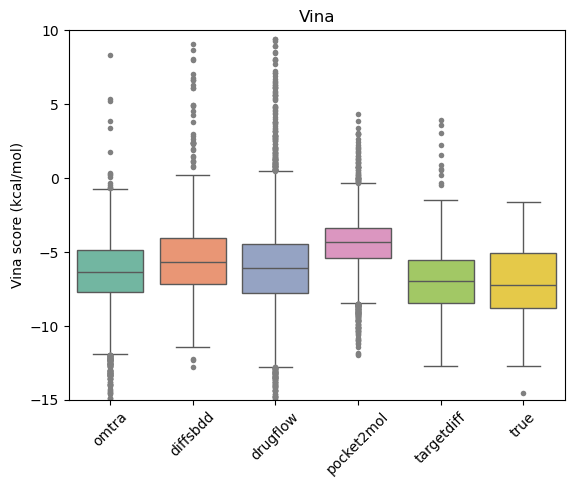

In [28]:
compare_distribution(data=all_results, metric='minimizedAffinity', labels={'title': 'Vina', 'ylabel': 'Vina score (kcal/mol)', 'bounds': (-15,10)})

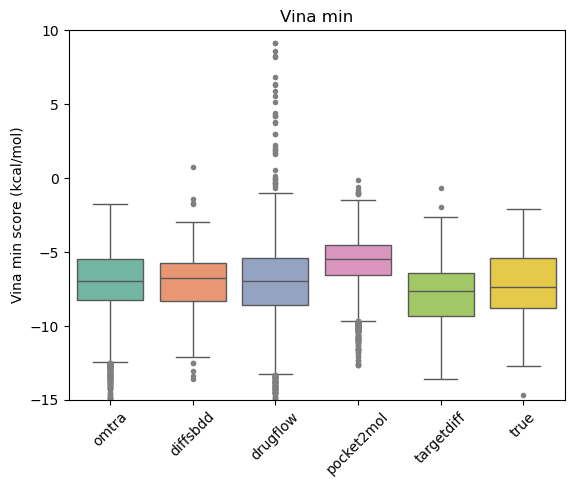

In [29]:
compare_distribution(data=all_results, metric='vina_min', labels={'title': 'Vina min', 'ylabel': 'Vina min score (kcal/mol)', 'bounds': (-15, 10)})

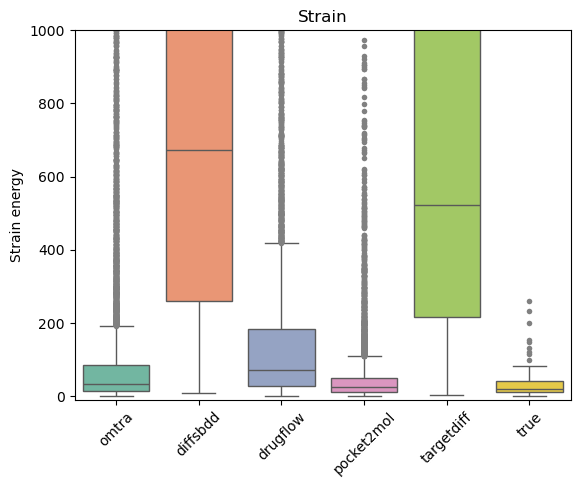

In [30]:
compare_distribution(data=all_results, metric='strain', labels={'title': 'Strain', 'ylabel': 'Strain energy', 'bounds': (-10, 1000)})

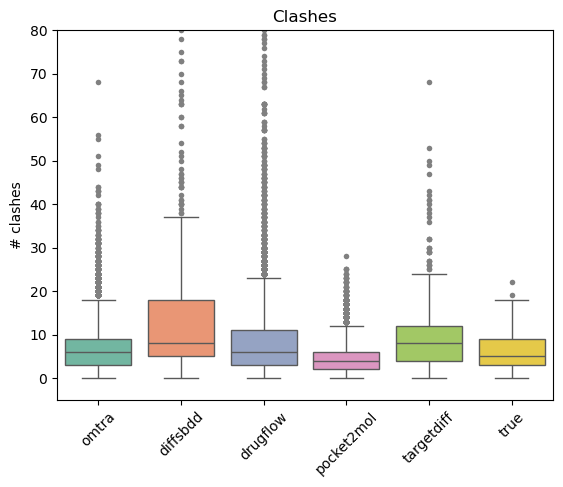

In [31]:
compare_distribution(data=all_results, metric='clashes', labels={'title': 'Clashes', 'ylabel': '# clashes', 'bounds': (-5, 80)})

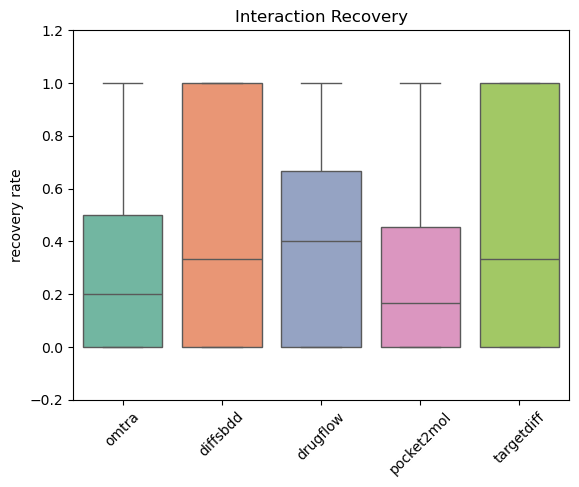

In [32]:
compare_distribution(data=all_results[all_results['model'] != 'true'], metric='interaction_recovery', labels={'title': 'Interaction Recovery', 'ylabel': 'recovery rate', 'bounds': (-0.2, 1.2)})

In [ ]:
compare_distribution(data=all_results, metric='rmsd', labels={'title': 'RMSD', 'ylabel': 'rmsd', 'bounds': (-1, 10)})

In [ ]:
compare_distribution(data=all_results[all_results['model'].isin(['rigid_docking_pharm', 'rigid_prot_pharm_lig_denovo'])], metric='frac_true_pharms_matched', labels={'title': 'Fraction of True Pharmacophore Centers Matched', 'ylabel': 'fraction', 'bounds': (-0.2, 1.2)})

In [20]:
# PoseBusters checks
pb_checks = [col for col in all_results if 'pb_' in col]
pb = all_results.copy()
pb = pb[pb_checks].copy()
pb[['model','sys_id']] = all_results[['model', 'sys_id']]

pb_summary = pd.DataFrame(index=pb_checks, columns=all_results['model'].unique())

for check in pb_checks:
    pb[check] = pd.to_numeric(pb[check], errors='coerce')
    sys_avg = pb.groupby(['model', 'sys_id'])[check].mean()
    model_avg = sys_avg.groupby('model').mean()

    pb_summary.loc[check, :] = model_avg

pb_summary

,omtra,diffsbdd,drugflow,pocket2mol,targetdiff,true
pb_mol_pred_loaded,1.0,1.0,1.0,1.0,1.0,1.0
pb_mol_cond_loaded,1.0,1.0,1.0,1.0,1.0,1.0
pb_sanitization,1.0,1.0,1.0,1.0,1.0,1.0
pb_inchi_convertible,1.0,1.0,0.995711,1.0,1.0,1.0
pb_all_atoms_connected,0.994373,1.0,0.95269,1.0,1.0,1.0
pb_bond_lengths,0.996451,0.750904,0.917268,0.964767,0.993275,1.0
pb_bond_angles,0.999278,0.666118,0.945054,0.99814,0.705732,1.0
pb_internal_steric_clash,0.996184,0.919042,0.969054,0.993372,0.894589,1.0
pb_aromatic_ring_flatness,1.0,1.0,0.999721,0.99814,1.0,1.0
pb_non-aromatic_ring_non-flatness,0.998787,0.987643,0.989405,0.992093,0.925844,1.0


In [35]:
# Table 2 from FLOWR
# 100 samples, 100 replicates

summary_table_1 = pd.DataFrame(index=all_results['model'].unique())
table_metrics = {'pb_valid': 'PB-valid',
                 'strain': 'Strain',
                 'clashes': 'Clashes',
                 'minimizedAffinity': 'Vina score',
                 'vina_min': 'Vina min score',
                 'CNNaffinity': 'Gnina score',
                 'interaction_recovery':'interaction recovery rate' }
                 #'rmsd': 'RMSD'}

for metric, name in table_metrics.items():
    # ensure numeric; non-numeric -> NaN
    all_results[metric] = pd.to_numeric(all_results[metric], errors='coerce')
    
    sys_avg = all_results.groupby(['model', 'sys_id'])[metric].mean()
    mean = sys_avg.groupby('model').mean()
    #std = sys_avg.groupby('model').std()
    
    # safely handle NaNs in formatting
    #summary_table_1[name] = mean.round(3).astype(str).fillna('NaN') + " ± " + std.round(3).astype(str).fillna('NaN')
    summary_table_1[name] = mean.round(3).astype(str).fillna('NaN').fillna('NaN')

summary_table_1

,PB-valid,Strain,Clashes,Vina score,Vina min score,Gnina score,interaction recovery rate
omtra,0.892,745.593,7.058,-6.389,-6.96,5.108,0.294
diffsbdd,0.391,1464.92,16.204,-3.496,-7.018,5.043,0.427
drugflow,0.728,4491.959,9.001,-5.862,-7.06,5.174,0.436
pocket2mol,0.866,50.335,4.61,-4.454,-5.617,3.95,0.259
targetdiff,0.486,1792.401,10.294,-6.767,-7.854,5.248,0.455
true,0.977,37.882,6.256,-7.08,-7.203,5.055,nan


In [46]:
metrics = {'omtra': omtra_metrics,
           'diffsbdd': diffsbdd_metrics,
           'drugflow': drugflow_metrics,
           'pocket2mol': pocket2mol_metrics,
           'targetdiff': targetdiff_metrics}

metric = 'strain'
for model, metrics_df in metrics.items():
    print(model, metrics_df[metric].isna().sum())

omtra 234
diffsbdd 33
drugflow 1055
pocket2mol 2
targetdiff 37


In [41]:
omtra_metrics.shape[0]

8600

In [22]:
# Table 2 from DrugFlow

from scipy.stats import wasserstein_distance

models = list(set(all_results['model'].unique()) - {'true'})
summary_table_2 = pd.DataFrame(index=models)
table_metrics = {'minimizedAffinity': 'Vina score',
                 'CNNscore': 'Gnina score',
                 'HBAcceptor': 'H-bond (acc.)',
                 'HBDonor': 'H-bond (don.)',
                 'Hydrophobic': 'Hydrophobic'}

for metric, name in table_metrics.items():
    true_dist = all_results.loc[all_results['model'] == 'true', metric].dropna().astype(np.float64).to_numpy()

    for model in models:
        data_dist = all_results.loc[all_results['model'] == model, metric].dropna().astype(np.float64).to_numpy()
        summary_table_2.loc[model, name] = wasserstein_distance(data_dist, true_dist) 

summary_table_2

,Vina score,Gnina score,H-bond (acc.),H-bond (don.),Hydrophobic
diffsbdd,3.584602,0.285601,0.026141,0.023062,0.032557
omtra,0.736354,0.158419,0.023530,0.012911,0.059967
pocket2mol,2.626646,0.148406,0.012152,0.014071,0.071652
targetdiff,0.561430,0.192549,0.023218,0.019349,0.055849
drugflow,1.220784,0.065181,0.010120,0.005053,0.019073


# Single Model Analysis

In [32]:
metrics_path = '/net/galaxy/home/koes/icd3/moldiff/OMTRA/local/mlsb_runs/plinder_and_crossdocked/mt_prot_cd_2025-09-16_05-12-907612/samples_fixed_protein_ligand_denovo_condensed_crossdocked/eval_metrics.csv'
data = pd.read_csv(metrics_path)

## Plots

In [34]:
import matplotlib.pyplot as plt

def plot_by_sys(data, metric, order="desc"):
   
    metric_true = f"{metric}_true"

    # Group by system
    grouped = data.groupby('sys_id')

    # Collect replicates + truths
    replicates = [g[metric].dropna().values for _, g in grouped]
    truths = [g[metric_true].iloc[0] for _, g in grouped]
    systems = list(grouped.groups.keys())

    # Sort systems by truth
    reverse = (order == "desc")
    ordered = sorted(zip(systems, replicates, truths), key=lambda x: x[2], reverse=reverse)
    systems, replicates, truths = zip(*ordered)

    # Plot
    fig, ax = plt.subplots(figsize=(12,6))
    bp = ax.boxplot(replicates, positions=range(len(systems)), patch_artist=True)
    ax.scatter(range(len(systems)), truths, color="red", marker="x", s=100, label="Ground truth", zorder=3)

    # Format axes
    ax.set_xticks(range(len(systems)))
    ax.set_xticklabels(systems, rotation=90, ha="right")
    ax.set_ylabel(metric)
    ax.set_title(f"{metric}: replicates vs ground truth (sorted {order})")

    plt.tight_layout()
    return fig, ax

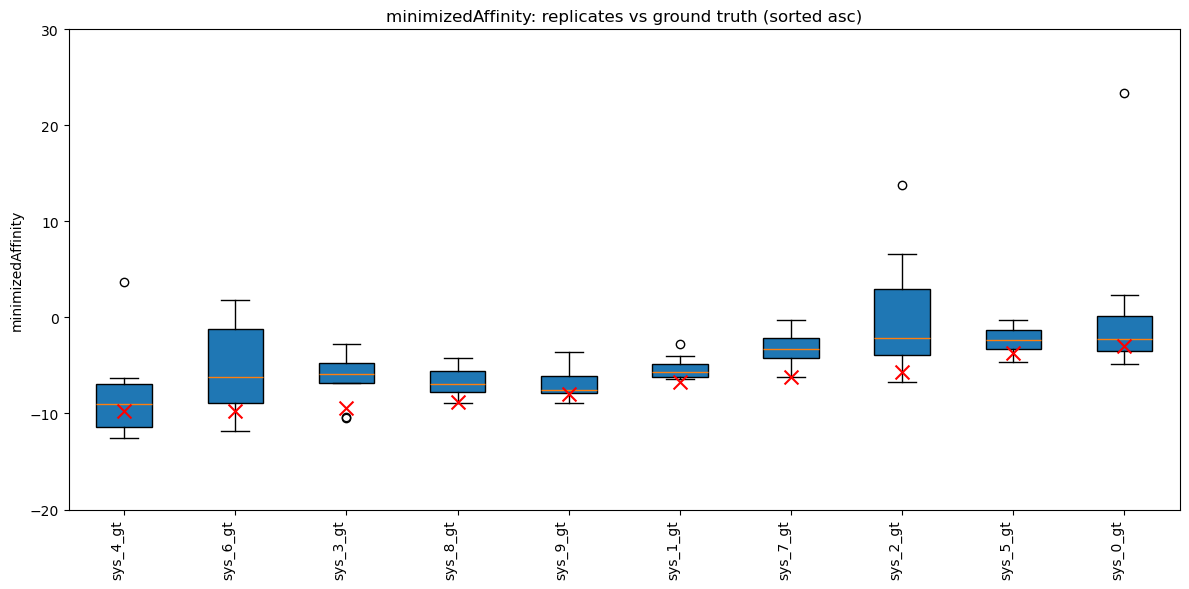

In [35]:
fig, ax = plot_by_sys(data, "minimizedAffinity", order="asc")

ax.set_ylim(-20, 30)
fig.show()

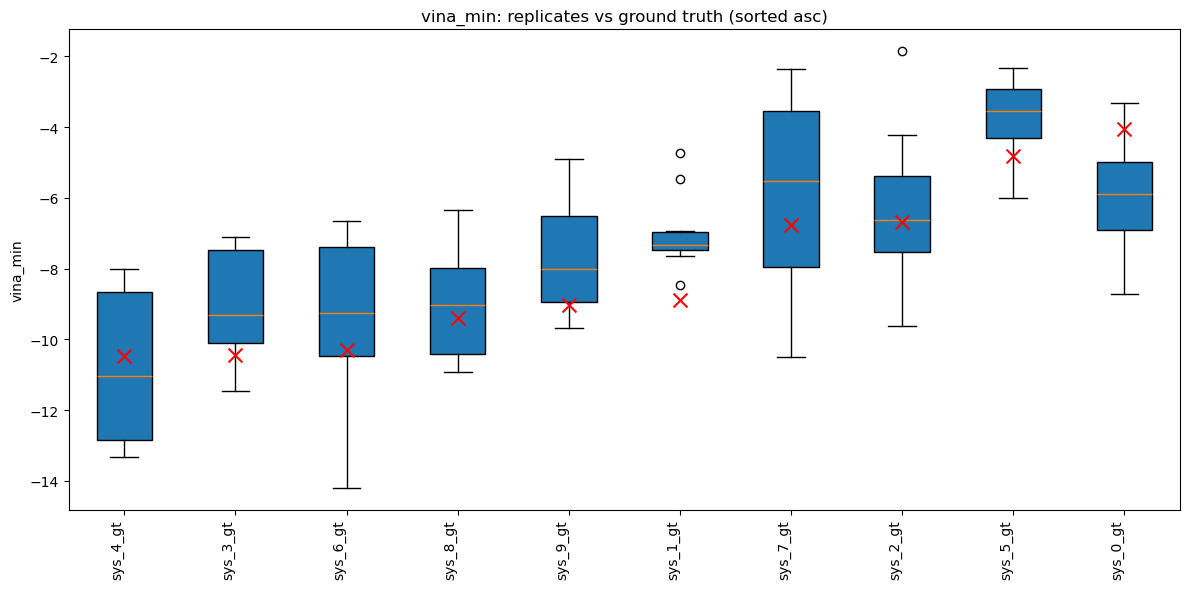

In [36]:
fig, ax = plot_by_sys(data, "vina_min", order="asc")

fig.show()

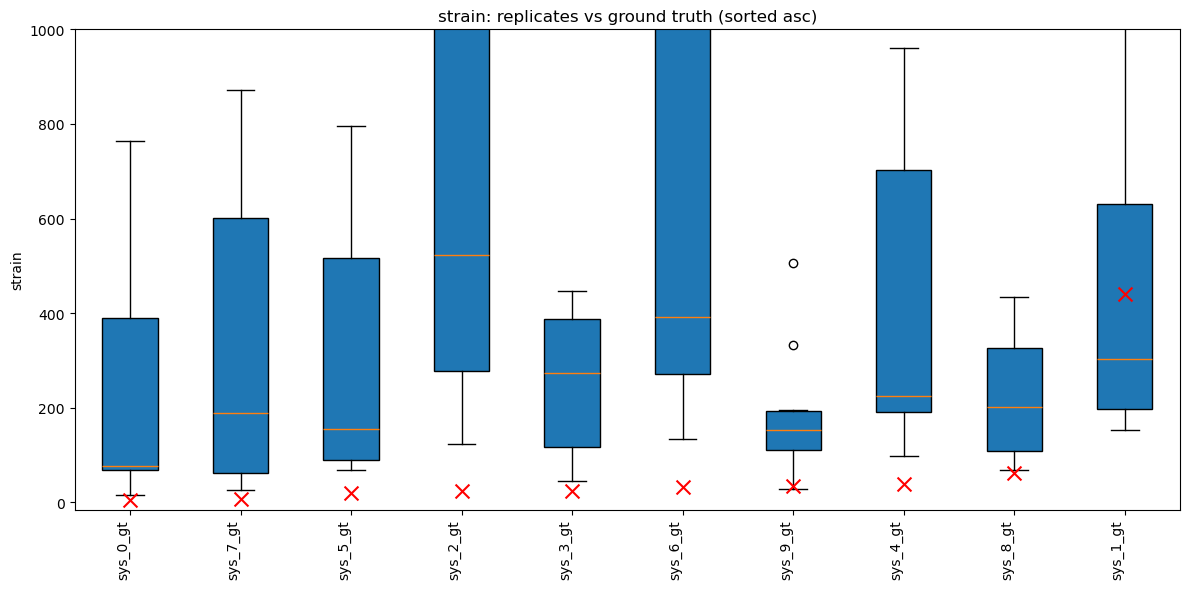

In [37]:
fig, ax = plot_by_sys(data, "strain", order="asc")

ax.set_ylim(-15, 1000)
fig.show()

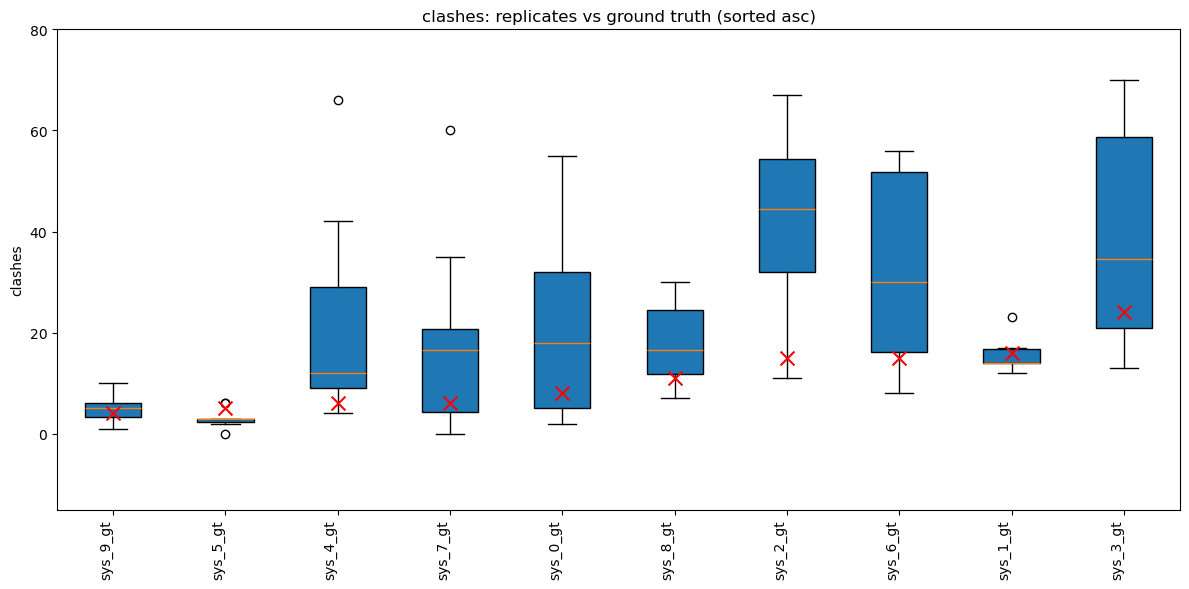

In [38]:
fig, ax = plot_by_sys(data, "clashes", order="asc")

ax.set_ylim(-15, 80)
fig.show()

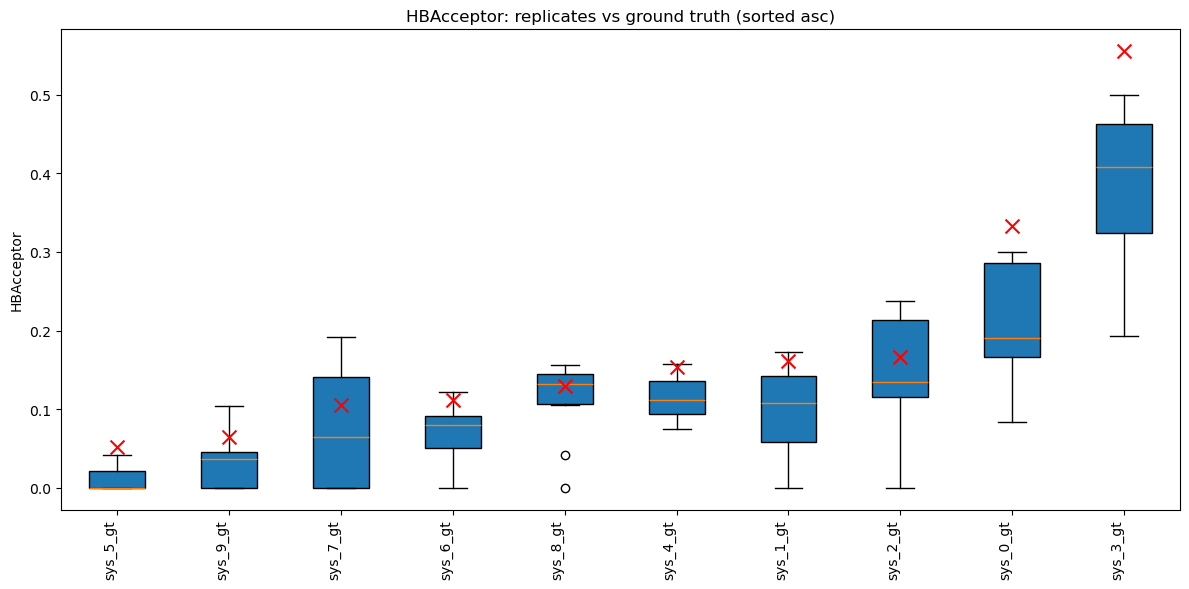

In [39]:
fig, ax = plot_by_sys(data, "HBAcceptor", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

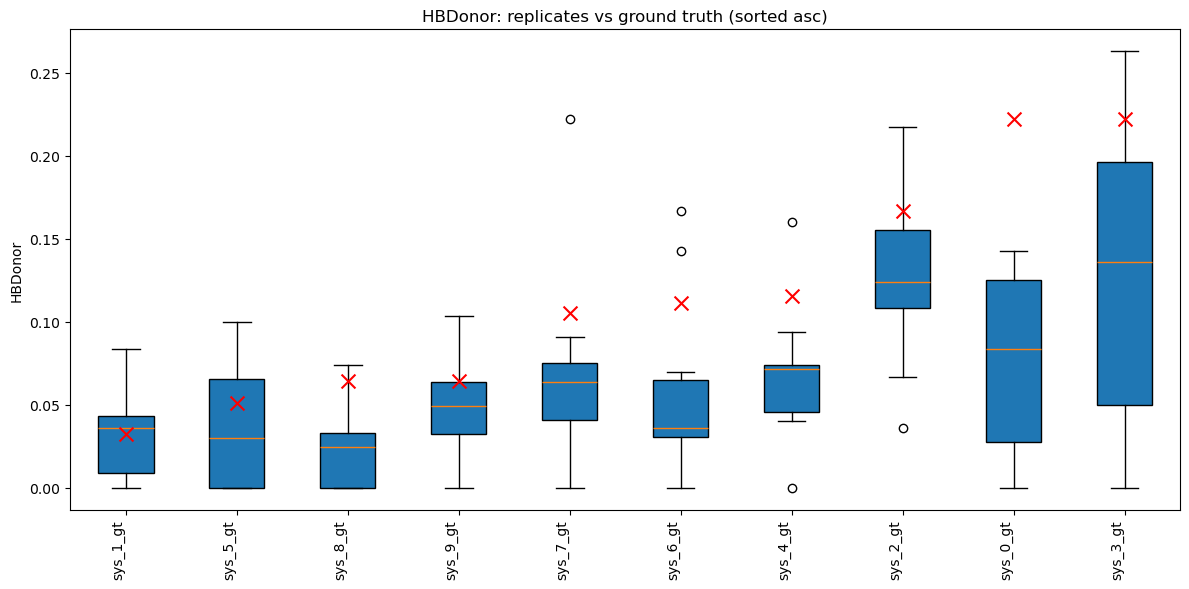

In [40]:
fig, ax = plot_by_sys(data, "HBDonor", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

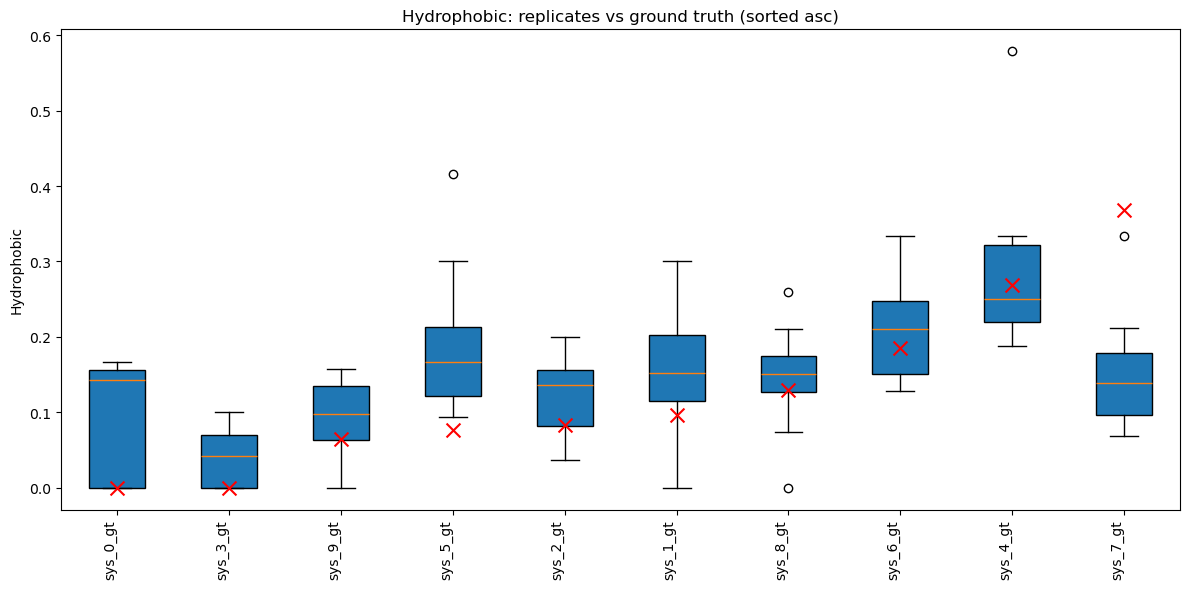

In [41]:
fig, ax = plot_by_sys(data, "Hydrophobic", order="asc")

#ax.set_ylim(-15, 80)
fig.show()

## Docking Eval

In [31]:
# Ranking by GNINA score
data['gnina_rank'] = data.groupby('sys_id')['minimizedAffinity'].rank(method='first', ascending=True).astype(int)


print(f"Number of systems where top ranked pose has rmsd <2å: {data[(data['pb_rmsd_≤_2å'] == True) & (data['gnina_rank'] == 1)].shape[0]}/{len(data['sys_id'].unique())}")
print(f"Number of systems with at least 1 pose with rmsd <2å in the top 5 ranked poses: {data[(data['pb_rmsd_≤_2å']) & (data['gnina_rank'] <= 5)].groupby('sys_id').ngroups}/{len(data['sys_id'].unique())}")

print(f"Average fraction of top 5 poses that have rmsd <2å: {data[data['gnina_rank'] <= 5].groupby('sys_id')['pb_rmsd_≤_2å'].mean().mean()}")

Number of systems where top ranked pose has rmsd <2å: 8/10
Number of systems with at least 1 pose with rmsd <2å in the top 5 ranked poses: 9/10
Average fraction of top 5 poses that have rmsd <2å: 0.8
